In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

filepath = './CleanData/NYC_MLdata.csv'
data = pd.read_csv(filepath)


In [3]:
'''
This is the Preprocessing part.
1) Label Encoding
2) One hot encoding
3) Splitting data into Train/test set 70/30
4) y = feature column, which is SALE PRICE
5) X = everything else, without the log transformation columns
'''

'\nThis is the Preprocessing part.\n1) Label Encoding\n2) One hot encoding\n3) Splitting data into Train/test set 70/30\n4) y = feature column, which is SALE PRICE\n5) X = everything else, without the log transformation columns\n'

In [4]:
#Rename column
data.rename(columns={'New Building Class Category': 'BUILDING CLASS'}, inplace=True)

#Use Label Encoder to transform categories into numbers
print(data['BUILDING CLASS'].unique())
label_encoder = LabelEncoder()
data['BUILDING CLASS'] = label_encoder.fit_transform(data['BUILDING CLASS'])
print(data['BUILDING CLASS'].unique())

print(data.info())

['A' 'B' 'C' 'D' 'R']
[0 1 2 3 4]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54023 entries, 0 to 54022
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    54023 non-null  int64  
 1   ZIP CODE                   54023 non-null  float64
 2   RESIDENTIAL UNITS          54023 non-null  float64
 3   COMMERCIAL UNITS           54023 non-null  float64
 4   TOTAL UNITS                54023 non-null  float64
 5   LAND SQUARE FEET           54023 non-null  float64
 6   GROSS SQUARE FEET          54023 non-null  float64
 7   TAX CLASS AT TIME OF SALE  54023 non-null  int64  
 8   SALE PRICE                 54023 non-null  int64  
 9   SALE PRICE_log             54023 non-null  float64
 10  LAND SQUARE FEET_log       54023 non-null  float64
 11  GROSS SQUARE FEET_log      54023 non-null  float64
 12  BUILDING CLASS             54023 non-null  int32  
 13  BUILDING AGE

In [5]:
# Select the categorical columns
categorical_columns = ['BOROUGH', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS']

# Create a new DataFrame with the selected columns
data_categorical = data[categorical_columns]

# Perform one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(data_categorical)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the updated DataFrame information
print(data_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54023 entries, 0 to 54022
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP CODE                     54023 non-null  float64
 1   RESIDENTIAL UNITS            54023 non-null  float64
 2   COMMERCIAL UNITS             54023 non-null  float64
 3   TOTAL UNITS                  54023 non-null  float64
 4   LAND SQUARE FEET             54023 non-null  float64
 5   GROSS SQUARE FEET            54023 non-null  float64
 6   SALE PRICE                   54023 non-null  int64  
 7   SALE PRICE_log               54023 non-null  float64
 8   LAND SQUARE FEET_log         54023 non-null  float64
 9   GROSS SQUARE FEET_log        54023 non-null  float64
 10  BUILDING AGE                 54023 non-null  int64  
 11  BOROUGH_1                    54023 non-null  float64
 12  BOROUGH_2                    54023 non-null  float64
 13  BOROUGH_3       

In [6]:
#Splitting data into train/test split

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


X = data_encoded.drop(columns=['SALE PRICE', 'SALE PRICE_log', 'GROSS SQUARE FEET_log', 'LAND SQUARE FEET_log'])  # Drop the target column from the features
y = data_encoded['SALE PRICE']  # Extract the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#We will evaluate model on MAE (lower = better), RMSE (lower = better) and r-squared value (higher = better)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(y_test, y_pred, model_name):
    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Plotting Residuals
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residual Plot')
    plt.show()

    # Plotting y_pred vs y_test
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Adding the diagonal line
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(f'{model_name}: Predictions vs. Actual')
    plt.show()
    
   
    return rmse, mae, r2








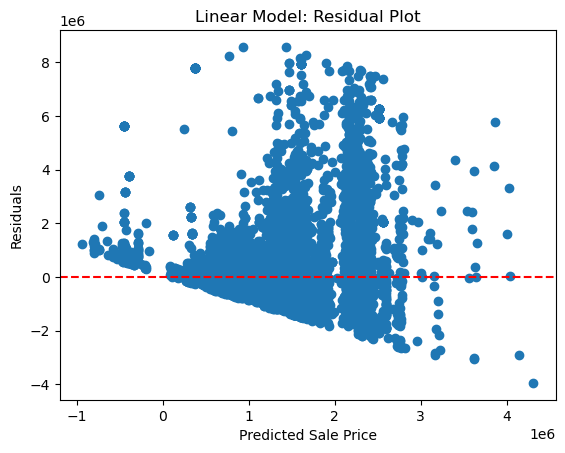

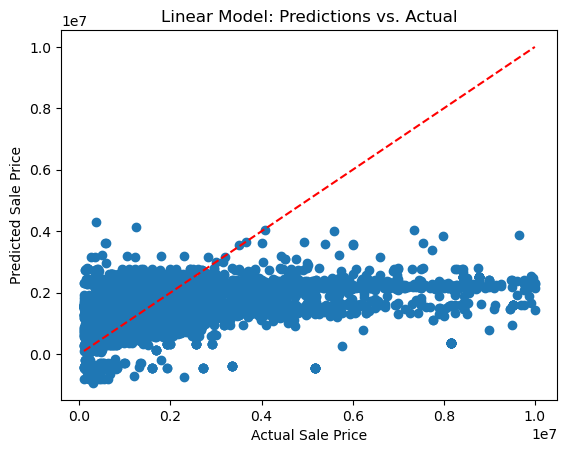

Root Mean Squared Error: 1172347.6669668737
Mean Absolute Error: 687382.1436242536
R-squared: 0.21603056341499183


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#FIRST Model: Basic Linear Regression
#Using Pipeline to build model
steps = [
    ('scaler', StandardScaler()), # Step 1: StandardScaler
    ('model', LinearRegression()) # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Linear Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

In [8]:
# Summary statistics for y_train
print("Summary Statistics for y_train:")
print(y_train.describe())


# Summary statistics for y_test
print("\nSummary Statistics for y_test:")
print(y_test.describe())

print("Comparing X_train and X_test")
print(X_train.describe())
print(X_test.describe())

Summary Statistics for y_train:
count    3.781600e+04
mean     1.212768e+06
std      1.319113e+06
min      1.000000e+05
25%      5.250000e+05
50%      8.000000e+05
75%      1.340000e+06
max      1.000000e+07
Name: SALE PRICE, dtype: float64

Summary Statistics for y_test:
count    1.620700e+04
mean     1.219089e+06
std      1.324098e+06
min      1.000000e+05
25%      5.300000e+05
50%      8.000000e+05
75%      1.330000e+06
max      9.999000e+06
Name: SALE PRICE, dtype: float64
Comparing X_train and X_test
           ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  \
count  37816.000000       37816.000000      37816.000000  37816.000000   
mean   10797.570684           2.655886          0.042998      3.013090   
std      583.112095          24.431771          0.250140     24.436802   
min    10001.000000           0.000000          0.000000      1.000000   
25%    10065.000000           0.000000          0.000000      1.000000   
50%    11204.000000           1.000000       

In [9]:
'''
Residual Plot: We want the residuals to be around the 0 mark. In this, we see that there is no real pattern in residuals
and for units around the $3,000,000 mark, the linear regression model produces huge residuals.

The Predict vs Actual plot the linear model predicts most sale prices to be under 5,000,000 despite sale price to be much higher.

Summary Statistics of X_train vs X_test and y_train vs y_test shows the data to be quite similar!

Conclusion: Linear Model is not great for prediction! But how bad is this model? Lets fit a DummyRegressor in the pipeline and maybe a polynomial regressor
'''

'\nResidual Plot: We want the residuals to be around the 0 mark. In this, we see that there is no real pattern in residuals\nand for units around the $3,000,000 mark, the linear regression model produces huge residuals.\n\nThe Predict vs Actual plot the linear model predicts most sale prices to be under 5,000,000 despite sale price to be much higher.\n\nSummary Statistics of X_train vs X_test and y_train vs y_test shows the data to be quite similar!\n\nConclusion: Linear Model is not great for prediction! But how bad is this model? Lets fit a DummyRegressor in the pipeline and maybe a polynomial regressor\n'

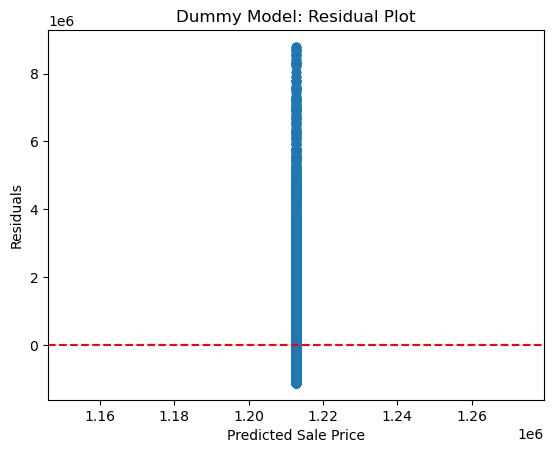

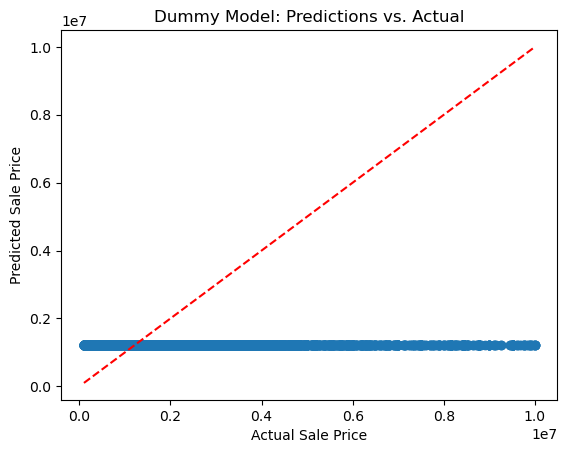

Root Mean Squared Error: 1324072.6243333062
Mean Absolute Error: 812307.5028086493
R-squared: -2.2790703689157255e-05


In [10]:
from sklearn.dummy import DummyRegressor

#SECOND Model: Dummy Regression
#Using Pipeline to create models
steps = [
    ('scaler', StandardScaler()), # Step 1: StandardScaler
    ('model', DummyRegressor()) # Step 2: Dummy Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Dummy Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


In [11]:
'''
This offers a baseline for MAE and RMSE. Our final model will need to be significantly better than this!
'''

'\nThis offers a baseline for MAE and RMSE. Our final model will need to be significantly better than this!\n'

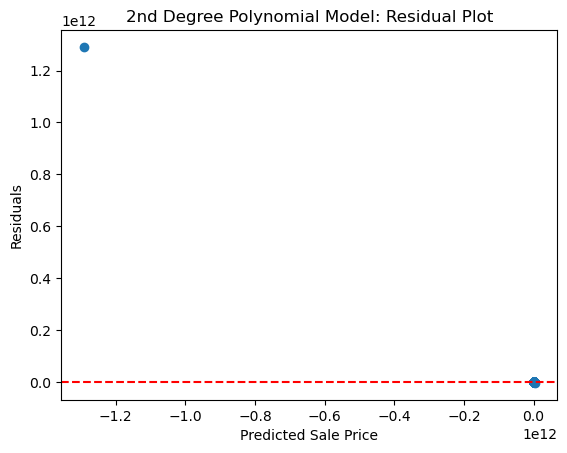

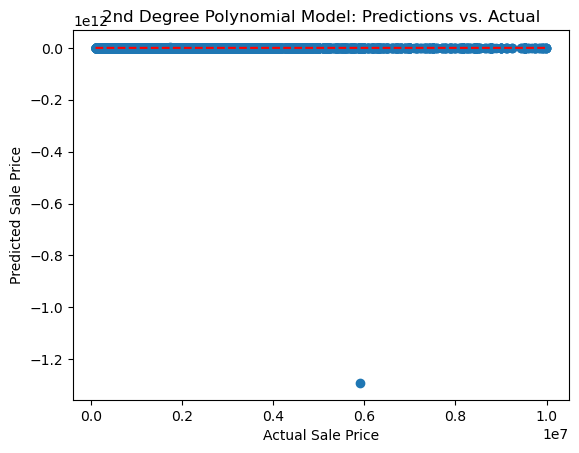

Root Mean Squared Error: 10142388696.601002
Mean Absolute Error: 80489371.92775163
R-squared: -58676848.25447016


In [12]:
#Third Model: 2nd Degree Regression
from sklearn.preprocessing import PolynomialFeatures

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('polynomial', PolynomialFeatures(degree=2)),  # Step 2: PolynomialFeatures
    ('model', LinearRegression())    # Step 3: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='2nd Degree Polynomial Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

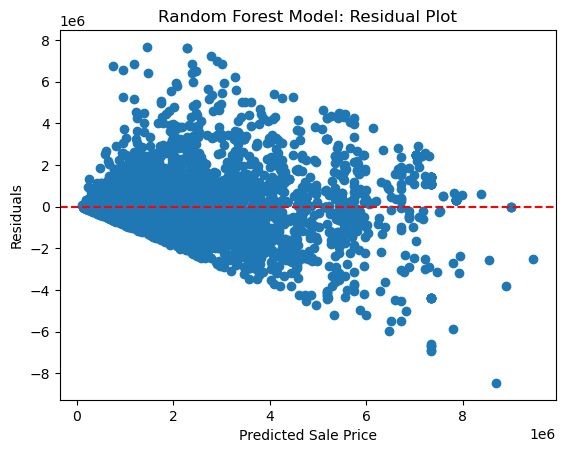

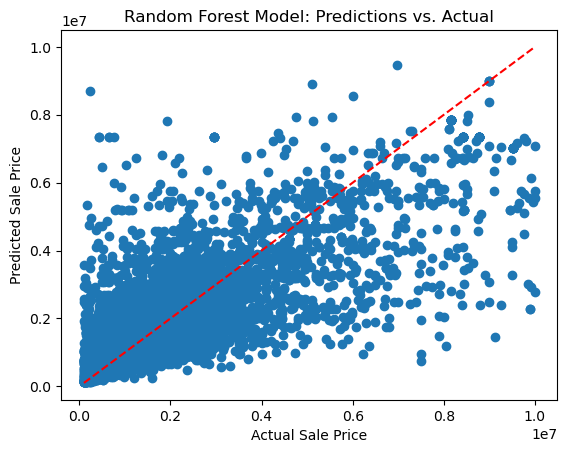

Root Mean Squared Error: 771417.1717335558
Mean Absolute Error: 390155.74002615956
R-squared: 0.6605585383252054


In [13]:
#Fourth Model: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('model', RandomForestRegressor(n_estimators=100))    # Step 2: RandomForest Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Random Forest Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Look at specific data points on the predictions vs actual plot below/under the linear line.
# 1) Create a dataframe of the testing data of preciction vs actual value and perform EDA
#2) Maybe reduce the scope to improve model's performance. Benchmark of 10% error

                        Feature  Importance
0                      ZIP CODE    0.252772
5             GROSS SQUARE FEET    0.173784
6                  BUILDING AGE    0.162928
4              LAND SQUARE FEET    0.154262
1             RESIDENTIAL UNITS    0.109469
9                     BOROUGH_3    0.025697
3                   TOTAL UNITS    0.024403
7                     BOROUGH_1    0.023046
18             BUILDING CLASS_3    0.017193
19             BUILDING CLASS_4    0.015050
2              COMMERCIAL UNITS    0.010245
13  TAX CLASS AT TIME OF SALE_2    0.008535
14  TAX CLASS AT TIME OF SALE_4    0.005205
12  TAX CLASS AT TIME OF SALE_1    0.004727
15             BUILDING CLASS_0    0.004673
17             BUILDING CLASS_2    0.004558
16             BUILDING CLASS_1    0.001511
10                    BOROUGH_4    0.001240
8                     BOROUGH_2    0.000531
11                    BOROUGH_5    0.000170
The feature with the highest importance is: ZIP CODE


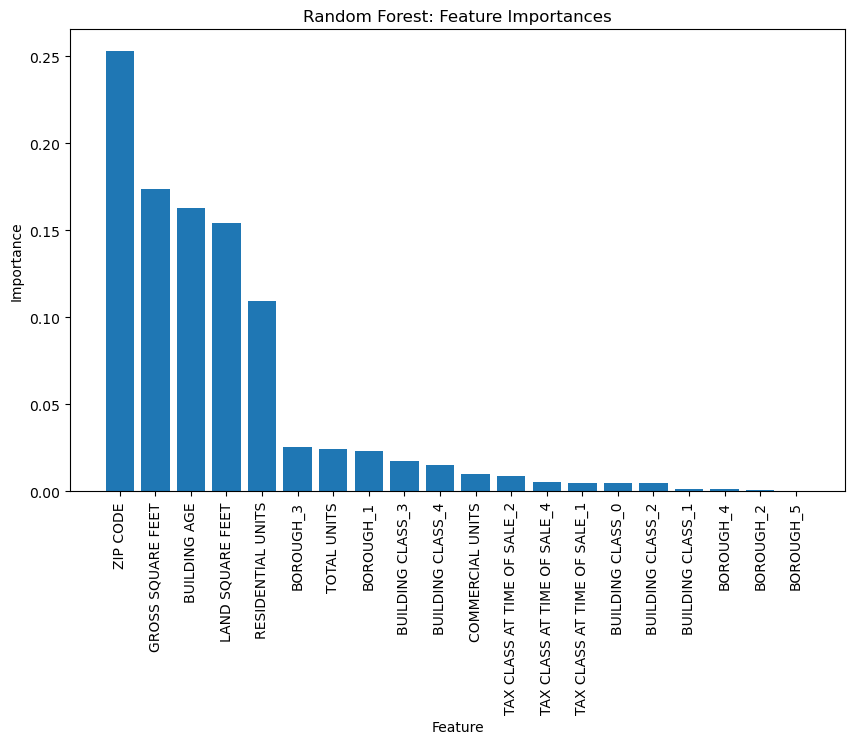

In [14]:
#The results here are much better, MAE decreased by 50% with R-squared increasing significantly
#Let's see which feature explains the variation the most.

# Access the RandomForestRegressor model from the pipeline
rf_model = pipeline.named_steps['model']

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Create a dataframe to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)

# Find the feature with the highest importance
highest_importance_feature = feature_importances['Feature'].iloc[0]
print(f"The feature with the highest importance is: {highest_importance_feature}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest: Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [15]:
'''
Let's take a closer look at the rf model results.
'''

"\nLet's take a closer look at the rf model results.\n"

In [16]:


# Assuming X_test and y_test are NumPy arrays, convert them to DataFrames
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
y_test_df = pd.DataFrame({'Actual_Sale_Price': y_test})

# Create a DataFrame for y_pred directly using the predicted values
y_pred_df = pd.DataFrame({'Predicted_Sale_Price': y_pred})

# Reset the indices of y_test_df and y_pred_df
X_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)

# Combine y_test_df and y_pred_df into combined_df
combined_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Add features from X_test_df to combined_df
combined_df = pd.concat([X_test_df, combined_df], axis=1)

# Display the combined DataFrame
print(combined_df.head())



   ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0   11222.0                1.0               0.0          1.0   
1   11249.0                1.0               0.0          1.0   
2   10019.0                0.0               0.0          1.0   
3   10025.0                1.0               0.0          1.0   
4   11229.0                1.0               0.0          1.0   

   LAND SQUARE FEET  GROSS SQUARE FEET  BUILDING AGE  BOROUGH_1  BOROUGH_2  \
0            2500.0             8600.0            17        0.0        0.0   
1            2250.0             2338.0            18        0.0        0.0   
2            2000.0             2283.5           124        1.0        0.0   
3            3549.0             3500.0            64        1.0        0.0   
4            3000.0             2800.0           105        0.0        0.0   

   BOROUGH_3  ...  TAX CLASS AT TIME OF SALE_1  TAX CLASS AT TIME OF SALE_2  \
0        1.0  ...                          0.0               

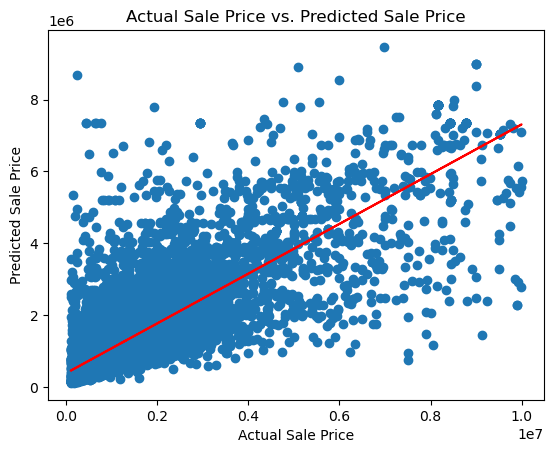

       ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
1       11249.0                1.0               0.0          1.0   
2       10019.0                0.0               0.0          1.0   
6       11201.0                1.0               0.0          1.0   
9       11215.0                1.0               0.0          1.0   
10      10005.0                1.0               0.0          1.0   
...         ...                ...               ...          ...   
16190   10011.0                1.0               0.0          1.0   
16193   10011.0                1.0               0.0          1.0   
16194   11211.0                1.0               0.0          1.0   
16195   11213.0                4.0               0.0          4.0   
16205   10003.0                1.0               0.0          1.0   

       LAND SQUARE FEET  GROSS SQUARE FEET  BUILDING AGE  BOROUGH_1  \
1                2250.0             2338.0            18        0.0   
2                2000.0      

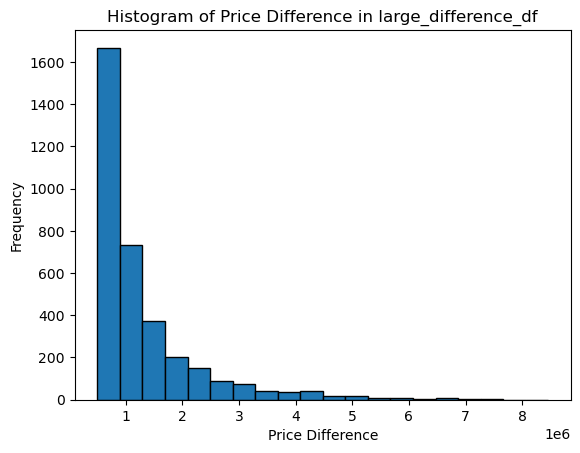

In [17]:

# Plot Actual_Sale_Price vs. Predicted_Sale_Price
plt.scatter(combined_df['Actual_Sale_Price'], combined_df['Predicted_Sale_Price'])
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual Sale Price vs. Predicted Sale Price')

# Add a line of best fit
coefficients = np.polyfit(combined_df['Actual_Sale_Price'], combined_df['Predicted_Sale_Price'], 1)
line_of_best_fit = np.polyval(coefficients, combined_df['Actual_Sale_Price'])
plt.plot(combined_df['Actual_Sale_Price'], line_of_best_fit, color='r')

plt.show()

# Calculate the absolute difference between Actual_Sale_Price and Predicted_Sale_Price
combined_df['Price_Difference'] = np.abs(combined_df['Actual_Sale_Price'] - combined_df['Predicted_Sale_Price'])

# Filter rows with Price_Difference > 1,000,000
large_difference_df = combined_df[combined_df['Price_Difference'] > 500000]
small_difference_df = combined_df[~(combined_df['Price_Difference'] > 500000)]

# Display the filtered DataFrame
print(large_difference_df)


# Let's look at the price difference distribution of large_difference_df
plt.hist(large_difference_df['Price_Difference'], bins=20, edgecolor='black')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Price Difference in large_difference_df')
plt.show()


In [18]:
#How much % of data in each borough is predicted incorrectly? 
print('% of units per Borough predicted incorrectly')
print(large_difference_df['BOROUGH_1'].sum()/X_test['BOROUGH_1'].sum())
print(large_difference_df['BOROUGH_2'].sum()/X_test['BOROUGH_2'].sum())
print(large_difference_df['BOROUGH_3'].sum()/X_test['BOROUGH_3'].sum())
print(large_difference_df['BOROUGH_4'].sum()/X_test['BOROUGH_4'].sum())
print(large_difference_df['BOROUGH_5'].sum()/X_test['BOROUGH_5'].sum())

print('% of Building types predicted incorrectly')
print(large_difference_df['BUILDING CLASS_0'].sum()/X_test['BUILDING CLASS_0'].sum())
print(large_difference_df['BUILDING CLASS_1'].sum()/X_test['BUILDING CLASS_1'].sum())
print(large_difference_df['BUILDING CLASS_2'].sum()/X_test['BUILDING CLASS_2'].sum())
print(large_difference_df['BUILDING CLASS_3'].sum()/X_test['BUILDING CLASS_3'].sum())
print(large_difference_df['BUILDING CLASS_4'].sum()/X_test['BUILDING CLASS_4'].sum())


# Wow! 45% of data samples from BOROUGH 1 (Manhattan) is predicted wrong by the model! 
# 25% of data samples from BOROUGH 3 (Brooklyn) is predicted wrong by the model! 


% of units per Borough predicted incorrectly
0.4592674805771365
0.056588520614389654
0.2334355104928083
0.0636211931581143
0.024475524475524476
% of Building types predicted incorrectly
0.06781750924784218
0.12095758084838303
0.2654001151410478
0.20993720993720993
0.3340409108452335


In [19]:
# Assuming you have two DataFrames, large_difference_df and NOT_large_difference_df

# Compute summary statistics for large_difference_df
large_difference_summary = large_difference_df.describe()

# Compute summary statistics for NOT_large_difference_df
small_difference_summary = small_difference_df.describe()

# Print the summary statistics for each group
print("Summary statistics for large_difference_df:")
print(large_difference_summary[['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'BUILDING AGE', 'ZIP CODE', 'RESIDENTIAL UNITS']])

print("\nSummary statistics for small_difference_df:")
print(small_difference_summary[['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'BUILDING AGE', 'ZIP CODE', 'RESIDENTIAL UNITS']])


#Interestingly, GROSS and LAND SQUARE FEET and BUILDING AGE doesnt cause much of a difference. However, ZIP code and Residential
# Unit means are very different among these 2 dfs! 

Summary statistics for large_difference_df:
       GROSS SQUARE FEET  LAND SQUARE FEET  BUILDING AGE      ZIP CODE  \
count        3469.000000       3469.000000   3469.000000   3469.000000   
mean         9928.569040       3995.551888     70.550014  10495.167772   
std         47206.502969       7175.178843     42.149602    585.711957   
min           380.000000        622.000000      0.000000  10001.000000   
25%          2048.000000       2000.000000     21.000000  10019.000000   
50%          2700.000000       2297.000000     75.000000  10032.000000   
75%          3528.000000       3210.000000    105.000000  11214.000000   
max        773169.000000      85137.000000    225.000000  11697.000000   

       RESIDENTIAL UNITS  
count        3469.000000  
mean            4.057942  
std            27.537001  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             1.000000  
max           458.000000  

Summary statistics for small_difference_df:
 

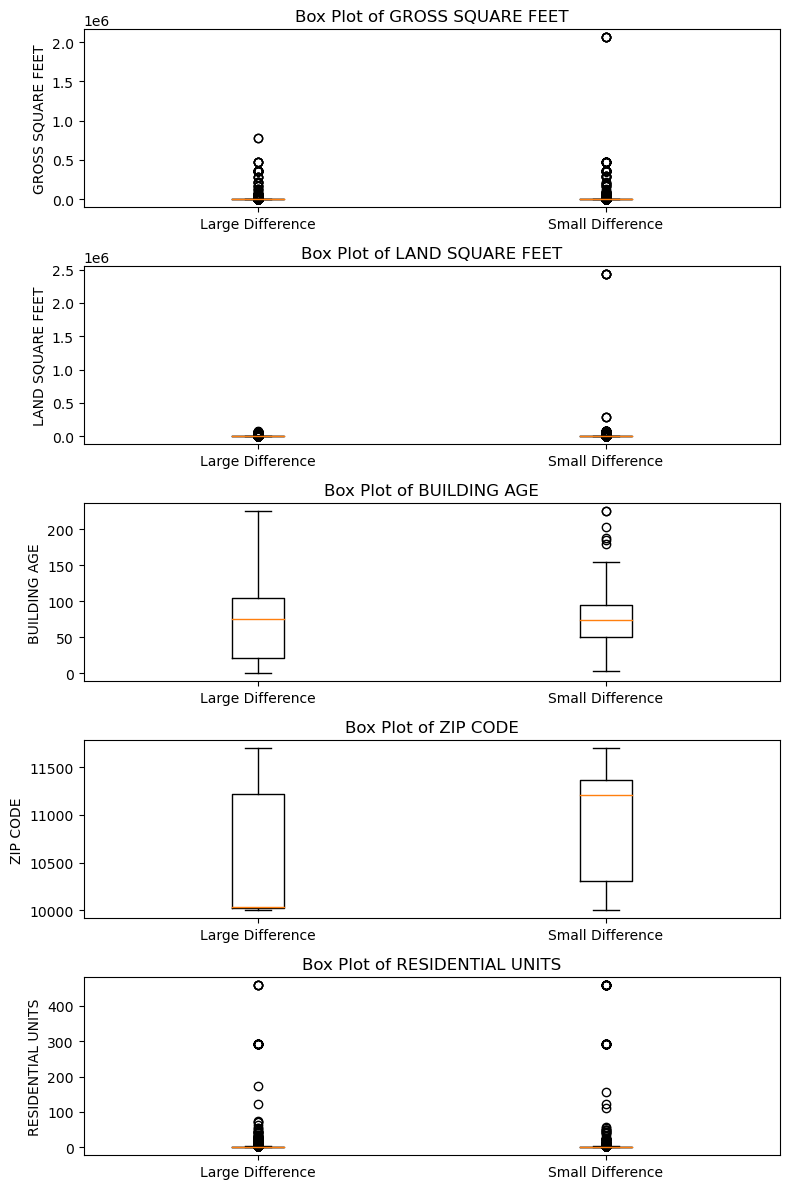

In [20]:
# Columns to compare
columns_to_compare = ['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'BUILDING AGE', 'ZIP CODE', 'RESIDENTIAL UNITS']

# Create subplots
fig, axs = plt.subplots(len(columns_to_compare), figsize=(8, 12))

# Box plots for each column
for i, column in enumerate(columns_to_compare):
    axs[i].boxplot([large_difference_df[column].dropna(), small_difference_df[column].dropna()])
    axs[i].set_xticklabels(['Large Difference', 'Small Difference'])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


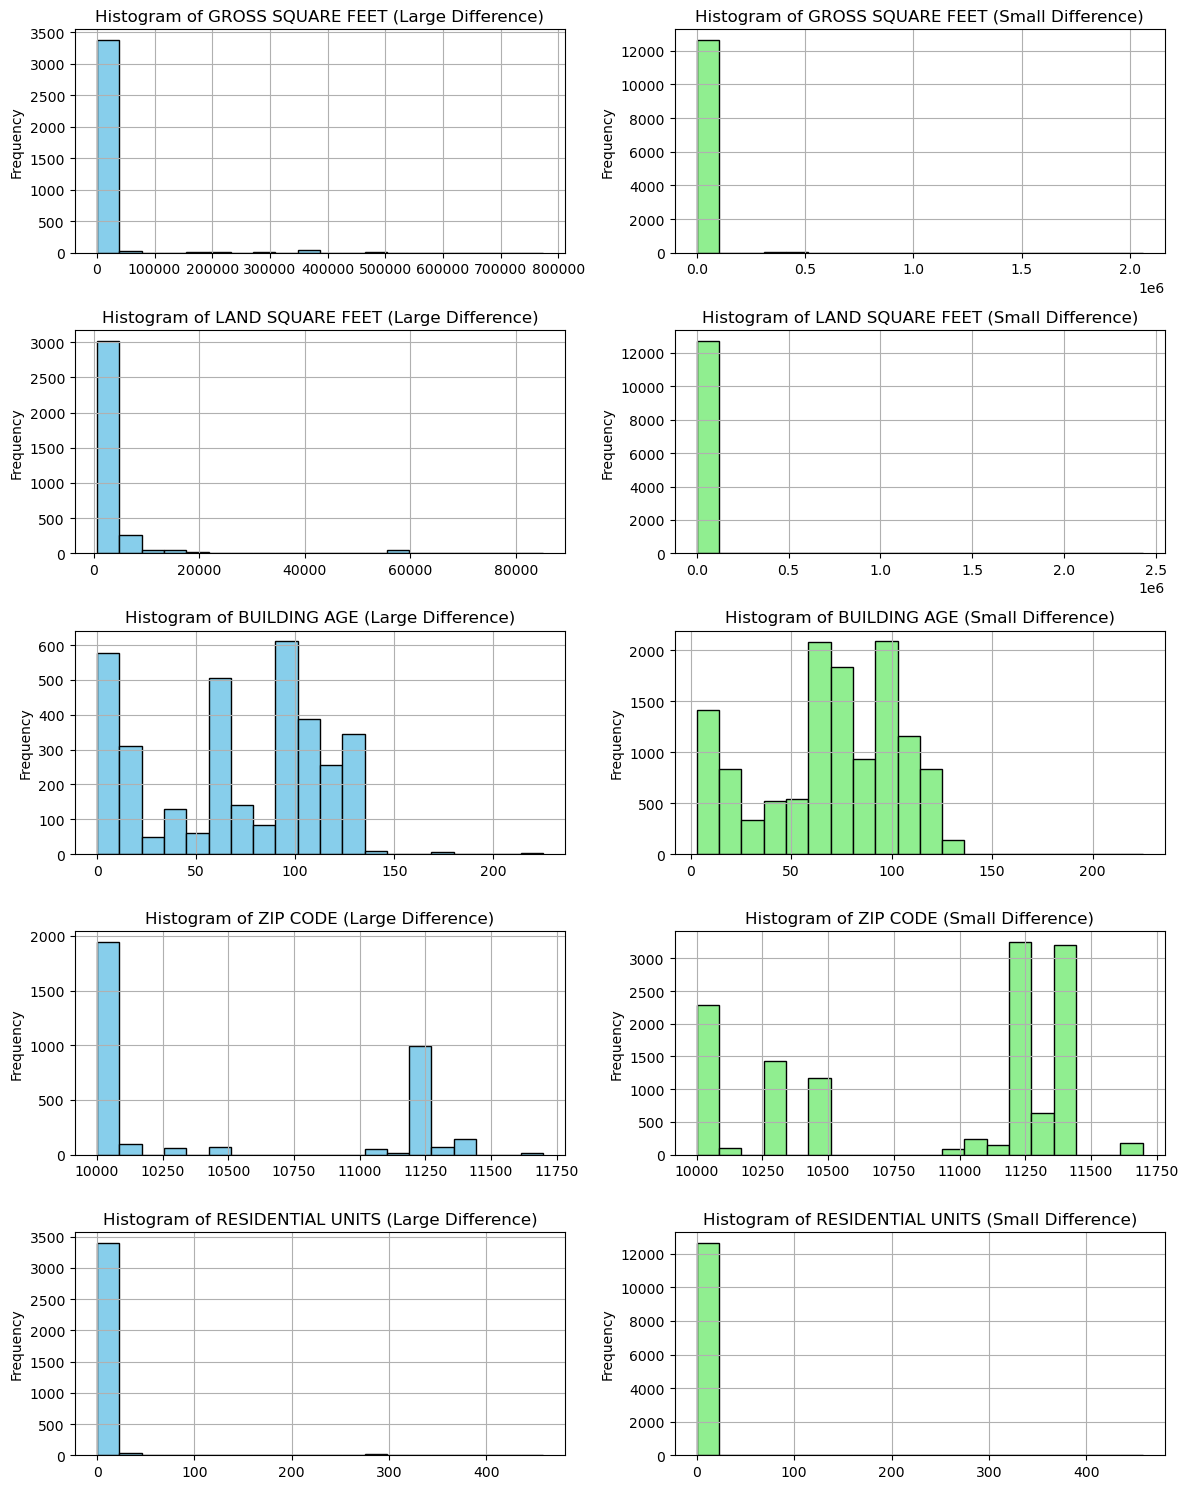

In [21]:
# Create subplots
fig, axs = plt.subplots(len(columns_to_compare), 2, figsize=(12, 15))

# Histograms for each column in large_difference_df
for i, column in enumerate(columns_to_compare):
    axs[i, 0].hist(large_difference_df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram of {column} (Large Difference)')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].grid(True)

# Histograms for each column in small_difference_df
for i, column in enumerate(columns_to_compare):
    axs[i, 1].hist(small_difference_df[column].dropna(), bins=20, color='lightgreen', edgecolor='black')
    axs[i, 1].set_title(f'Histogram of {column} (Small Difference)')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



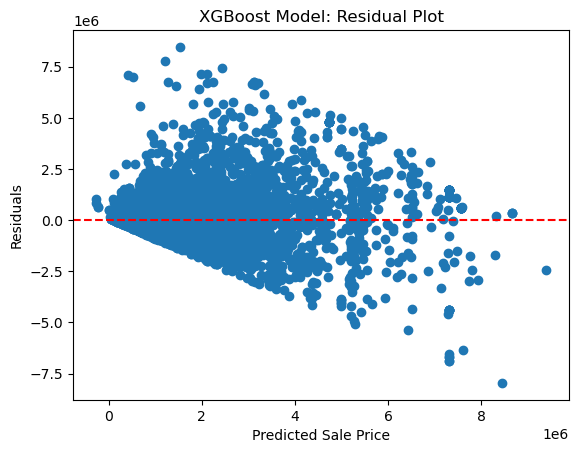

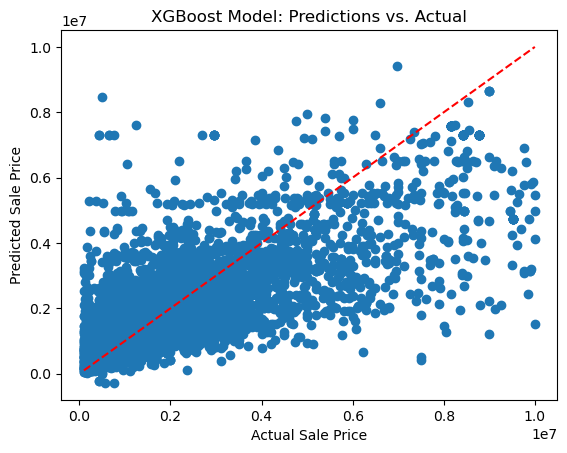

Root Mean Squared Error: 804761.6568665747
Mean Absolute Error: 429233.84515296126
R-squared: 0.6305796316279071


In [22]:
#Fifth Model: XGBOOST
import xgboost as xgb

#Using Pipeline to build the model
steps = [
    
    ('model', xgb.XGBRegressor())    # Step 1: XGBoost Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='XGBoost Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

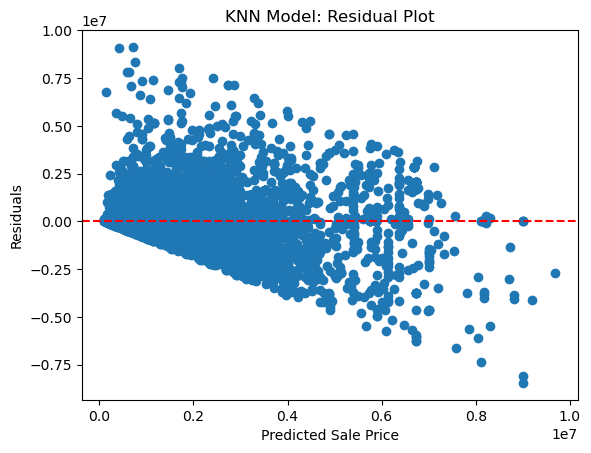

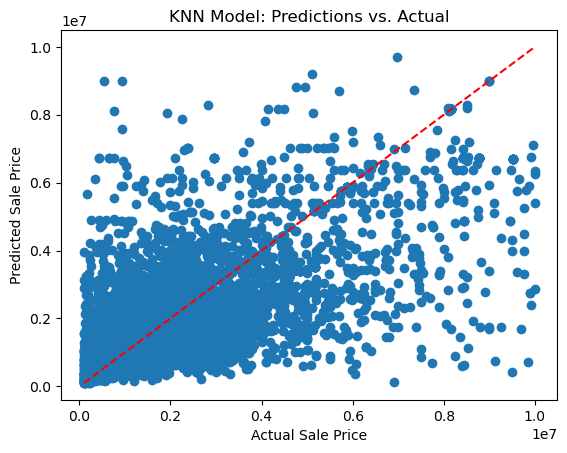

Root Mean Squared Error: 894564.0085801901
Mean Absolute Error: 456070.0455564468
R-squared: 0.5435332723244188


In [23]:
#Sixth Model: KNN Neighbours
from sklearn.neighbors import KNeighborsRegressor

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('model', KNeighborsRegressor(n_neighbors=3))    # Step 2: KNN Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='KNN Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

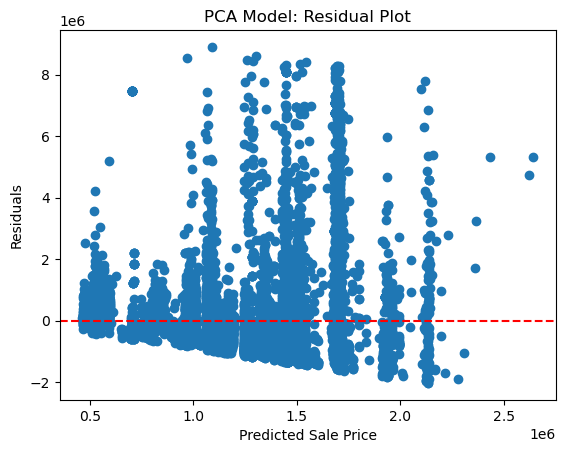

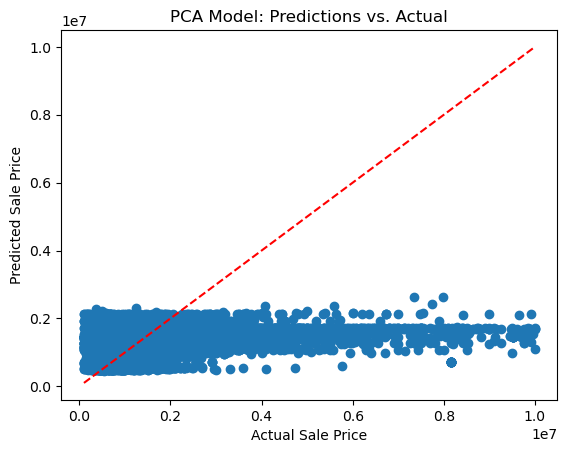

Root Mean Squared Error: 1263801.3458580046
Mean Absolute Error: 793221.9684315188
R-squared: 0.08894643500814403
Principal Component 1: Explained Variance Ratio = 0.1978795229394479, Explained Variance = 3.9576951154188365
Principal Component 2: Explained Variance Ratio = 0.12995670258777242, Explained Variance = 2.5992027846405943
Principal Component 3: Explained Variance Ratio = 0.10771191782705818, Explained Variance = 2.1542953243675966
Principal Component 4: Explained Variance Ratio = 0.09726218204323954, Explained Variance = 1.9452950819236534
Principal Component 5: Explained Variance Ratio = 0.07537809911252945, Explained Variance = 1.5076018490225649
Principal Component 6: Explained Variance Ratio = 0.06967794577253679, Explained Variance = 1.393595767464896
Principal Component 7: Explained Variance Ratio = 0.06154245187941736, Explained Variance = 1.2308815868158391
Principal Component 8: Explained Variance Ratio = 0.059226934288313784, Explained Variance = 1.1845700103381593

In [24]:
#Seventh Model: PCA + LinearRegression
from sklearn.decomposition import PCA

#Using Pipeline to build model
steps = [
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('pca', PCA(n_components=8)),  # Step 2: PCA with 8 components
    ('model', LinearRegression())  # Step 3: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='PCA Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


pca = pipeline.named_steps['pca']
# Get the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Get the explained variance for each principal component
explained_variances = pca.explained_variance_

# Print the explained variance ratio and explained variance
for i in range(len(explained_variance_ratios)):
    print(f"Principal Component {i + 1}: Explained Variance Ratio = {explained_variance_ratios[i]}, Explained Variance = {explained_variances[i]}")

In [25]:
''' 
After comparing the MAE, RMSE and R-squared of Linear Regression, Polynomial Regression, Random Forest, XGBoost and KNNRegressor
The optimal method producing the smallest RMSE and highest R-squared is Random Forest Regressor.
'''


' \nAfter comparing the MAE, RMSE and R-squared of Linear Regression, Polynomial Regression, Random Forest, XGBoost and KNNRegressor\nThe optimal method producing the smallest RMSE and highest R-squared is Random Forest Regressor.\n'

In [26]:
'''
Based on our analysis done on the y_test vs y_pred results, we will now create a new model on a subset of data which excludes
Manhattan data, since 44% of the predictions create very large errors!

We may need more data on Manhattan to create a better price model, but for now we will exclude it.
'''

'\nBased on our analysis done on the y_test vs y_pred results, we will now create a new model on a subset of data which excludes\nManhattan data, since 44% of the predictions create very large errors!\n\nWe may need more data on Manhattan to create a better price model, but for now we will exclude it.\n'

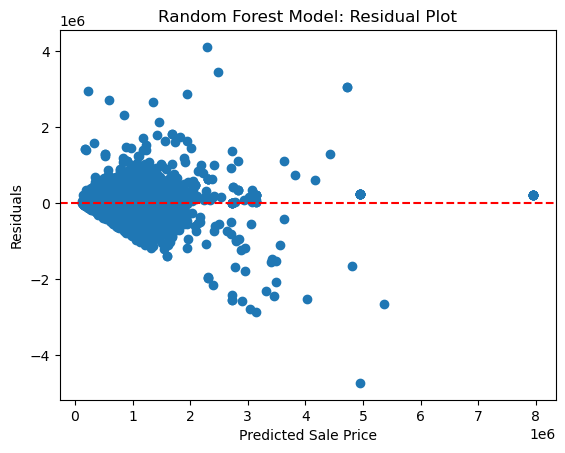

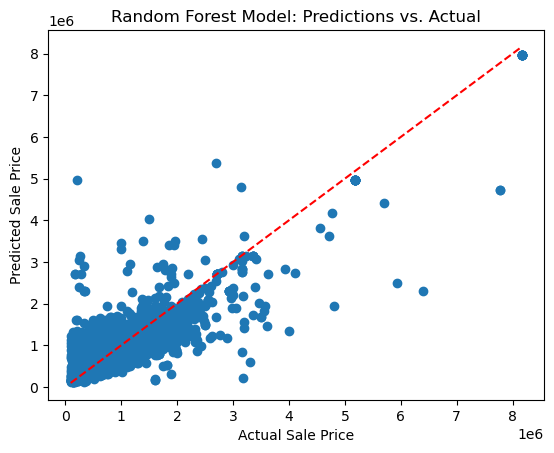

Root Mean Squared Error: 289961.4004652916
Mean Absolute Error: 158457.16708724495
R-squared: 0.7437885449430531


In [27]:
# Create a subset of data that excludes entries in Borough_1 (Manhattan) & Borough 3 (Brooklyn)

data_subset = data_encoded[(data_encoded['BOROUGH_1'] == 0) & (data_encoded['BOROUGH_3'] == 0) & (data_encoded['RESIDENTIAL UNITS'] < 20)]

# Now 'data_subset' will only contain rows where Borough_1 and Borough_3 are not present.


# Redo Train/Test Split on new dataset
X = data_subset.drop(columns=['SALE PRICE', 'SALE PRICE_log', 'GROSS SQUARE FEET_log', 'LAND SQUARE FEET_log'])  # Drop the target column from the features
y = data_subset['SALE PRICE']  # Extract the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Using Pipeline to build the model
steps = [
    ('scaler', StandardScaler()),     # Step 1: StandardScaler
    ('model', RandomForestRegressor(n_estimators=100))    # Step 2: RandomForest Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate metrics for model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Random Forest Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


In [28]:
print(y_train.describe())
print(y_test.describe())

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the absolute value of residuals
abs_residuals = abs(residuals)

# Filter X_test based on abs_residuals > 2,000,000
large_residuals = X_test[abs_residuals > 2000000]

# Display the filtered X_test
print(large_residuals)


count    1.737400e+04
mean     7.497852e+05
std      6.351985e+05
min      1.000000e+05
25%      4.070000e+05
50%      6.500000e+05
75%      9.017878e+05
max      9.850000e+06
Name: SALE PRICE, dtype: float64
count    7.446000e+03
mean     7.481450e+05
std      5.728885e+05
min      1.000000e+05
25%      4.200000e+05
50%      6.550000e+05
75%      9.000000e+05
max      8.158398e+06
Name: SALE PRICE, dtype: float64
       ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
33565   11105.0                9.0               1.0         10.0   
33903   11102.0                0.0               1.0          1.0   
52965   10301.0                8.0               0.0          8.0   
49543   10305.0                8.0               0.0          8.0   
345     10458.0                0.0               0.0          2.0   
49343   10312.0                7.0               0.0          7.0   
33566   11105.0               10.0               1.0         11.0   
1713    10455.0               

In [ ]:

'''
We will now perform hyperparameter tuning for our Random Forest Regressor model (n_esimators, max_Depth)
Step 1: Define our param_grid, we will also use RandomizedSearchCV to reduce computational complexity
Step 2: Fit into pipeline
Step 3: Perform Randomized Search CV with cv = 10 since we have quite a big data set
Step 4: Evaluate best model and save model
'''
#Google Colab?  


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the RandomForestRegressor
rf_model = RandomForestRegressor()

# Create the RandomizedSearchCV with n_jobs=-1 (use all available CPU cores)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    #n_jobs=-1   Use all available CPU cores for parallel processing
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate metrics for the best model
rmse, mae, r2 = calculate_metrics(y_test, y_pred, model_name='Best Random Forest Model')
print("Root Mean Squared Error:", rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


KeyboardInterrupt: 

In [29]:
# Perform cross-validation on the best_rf_model to get negative MAE scores
rf_neg_mae = cross_validate(best_rf_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

# Convert negative MAE scores back to positive MAE scores
mae_scores = -1 * rf_neg_mae['test_score']

# Calculate the mean and standard deviation of the MAE scores
rf_mae_mean = np.mean(mae_scores)
rf_mae_std = np.std(mae_scores)

print("Mean MAE:", rf_mae_mean)
print("MAE Standard Deviation:", rf_mae_std)

'''
This shows that our model has a mean MAE of $409325 and the stdev of the error is quite small at only $8889. 
'''

NameError: name 'best_rf_model' is not defined

In [ ]:
#Saving the model

import joblib

# Save the best_rf_model to a file
joblib.dump(best_rf_model, 'nyc_housing_price_model.pkl')

# Use this to Load the model from the file
#loaded_model = joblib.load('best_rf_model.pkl')